In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## import modules

In [5]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

## load the dataset


In [6]:
path=[]
labels=[]
for dirname, _, filenames in os.walk('/kaggle/input'):
   for filename in filenames:
    path.append(os.path.join(dirname, filename))
    label=filename.split('_')[-1]
    label=label.split('.')[0]
    labels.append(label.lower())
print("Dataset is Loaded")

Dataset is Loaded


In [7]:
path[:5]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav']

In [8]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [9]:
#create a dataframe
df=pd.DataFrame()
df['speech']=path
df['label']=labels
df.head()

,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [10]:
df['label'].value_counts()

label
fear       800
angry      800
disgust    800
neutral    800
sad        800
ps         800
happy      800
Name: count, dtype: int64

## Exploratory Data Analysis

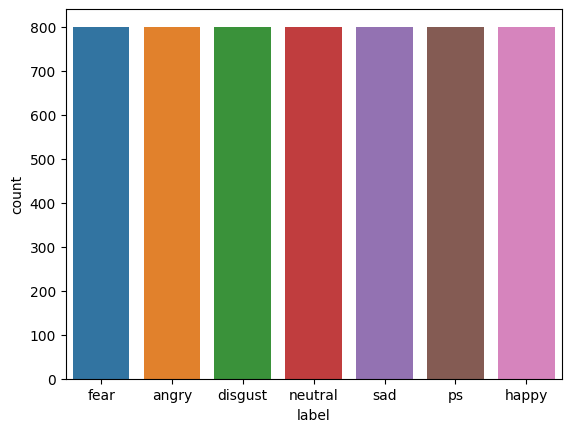

In [11]:
sns.countplot(data=df, x='label')
plt.show()

In [12]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()
    
def spectrogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()
    

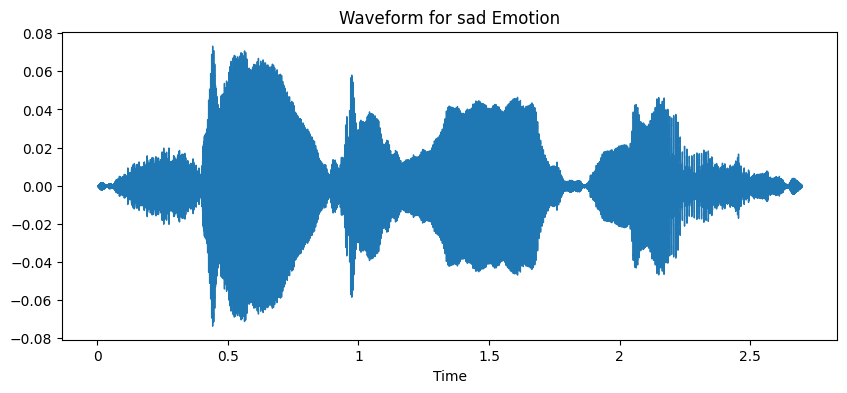

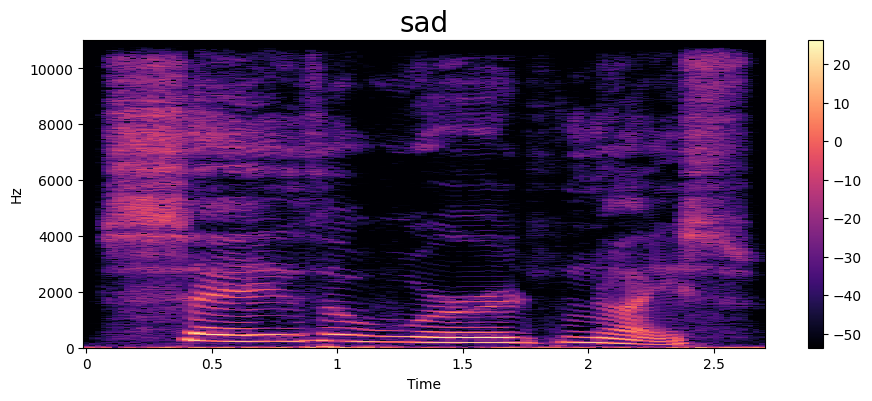

In [13]:


import librosa
import librosa.display
import matplotlib.pyplot as plt

emotion = 'sad'
path = df['speech'][df['label'] == emotion].values[4]
data, sampling_rate = librosa.load(path)

# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(data, sr=sampling_rate)
plt.title(f'Waveform for {emotion} Emotion')
plt.show()

# Assuming 'spectrogram' is a correctly defined function
spectrogram(data, sampling_rate, emotion)

# Assuming you want to play the audio using IPython.display.Audi
Audio(path)


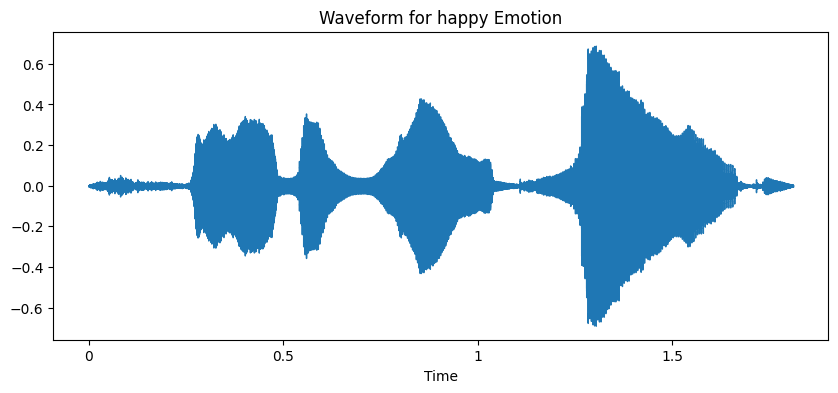

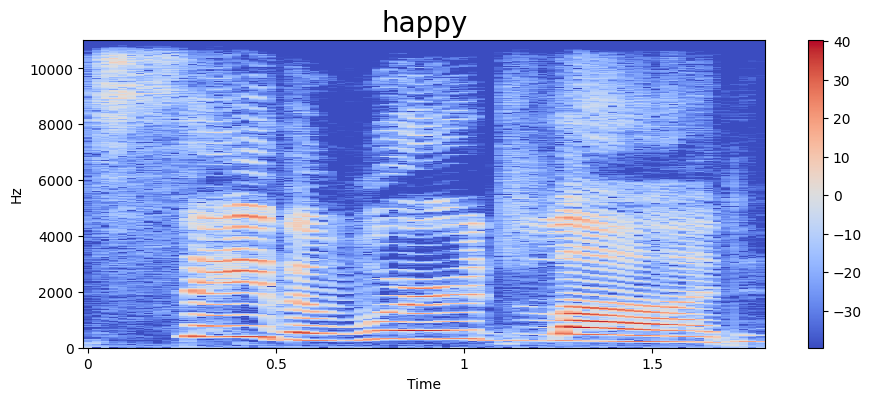

In [14]:

import librosa
import librosa.display
import matplotlib.pyplot as plt

emotion = 'happy'
path = df['speech'][df['label'] == emotion].values[6]
data, sampling_rate = librosa.load(path)

# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(data, sr=sampling_rate)
plt.title(f'Waveform for {emotion} Emotion')
plt.show()

# Assuming 'spectrogram' is a correctly defined function
spectrogram(data, sampling_rate, emotion)

# Assuming you want to play the audio using IPython.display.Audi
Audio(path)


## feature extraction

In [17]:
def extract_mfcc(filename):
    y,sr=librosa.load(filename,duration=3,offset=0.5)
    mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [18]:
extract_mfcc(df['speech'][4])

array([-3.4475479e+02,  4.6329193e+01, -2.4171413e+01,  1.9392921e+01,
        2.2625768e+00, -6.4602838e+00, -5.9306912e+00,  5.0365419e+00,
       -3.7448008e+00,  4.2035007e+00, -1.3067251e+01,  3.8527677e+00,
        4.0150270e+00, -1.1745484e+00,  5.7206163e+00, -1.6397866e+00,
       -2.7378016e+00,  1.4811408e+01, -6.4483538e+00,  9.2606020e+00,
        7.0931911e+00,  5.2222838e+00,  1.1610793e+01,  1.3823731e+01,
        3.0753829e+00,  6.9729037e+00, -5.5679722e+00,  1.5105499e+00,
        2.5273829e+00, -1.8999194e+00, -6.4314318e+00, -3.0122590e-01,
       -4.6688004e+00,  6.4380283e+00, -2.3902287e+00,  4.1108210e-02,
        1.8693422e+00,  1.5201238e+00, -8.0518341e-01, -2.1959646e+00],
      dtype=float32)

In [22]:
x_mfcc=df['speech'].apply(lambda x:extract_mfcc(x))

In [21]:
x_mfcc

0       [-285.73727, 85.78295, -2.1689112, 22.125532, ...
1       [-348.34332, 35.193233, -3.841328, 14.658875, ...
2       [-340.11435, 53.796444, -14.267782, 20.884027,...
3       [-306.63422, 21.259708, -4.4110823, 6.4871554,...
4       [-344.7548, 46.329193, -24.171413, 19.392921, ...
                              ...                        
5595    [-374.3952, 60.864998, 0.025059083, 8.431058, ...
5596    [-313.96478, 39.847843, -5.6493053, -3.867575,...
5597    [-357.54886, 77.886055, -15.224756, 2.194633, ...
5598    [-353.1474, 101.68391, -14.175896, -12.037376,...
5599    [-389.4595, 54.042767, 1.346998, -1.4258983, -...
Name: speech, Length: 5600, dtype: object

In [26]:
X=[x for x in x_mfcc]
X=np.array(X)
X.shape

(5600, 40)

In [27]:
##input split
x=np.expand_dims(X,-1)
x.shape

(5600, 40, 1)

In [33]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df[['label']])

In [45]:
y=y.toarray()

In [35]:
y.shape

(5600, 7)

## create the lstm model

In [44]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
model=Sequential([
    LSTM(123,return_sequences=False,input_shape=(40,1)),
    Dense(64,activation="relu"),
    Dropout(0,2),
    Dense(32,activation="relu"),
    Dropout(0,2),
    Dense(7,activation="softmax"),
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 123)               61500     
                                                                 
 dense_6 (Dense)             (None, 64)                7936      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71,747
Trainable params: 71,747
Non-trai

In [48]:
# Train the model
history = model.fit(X,y,validation_split=0.2,epochs=100,batch_size=512,shuffle=True)

Epoch 1/100
9/9 [==============================] - 4s 241ms/step - loss: 1.8342 - accuracy: 0.2103 - val_loss: 1.8501 - val_accuracy: 0.2018
Epoch 2/100
9/9 [==============================] - 2s 191ms/step - loss: 1.4857 - accuracy: 0.5263 - val_loss: 1.7379 - val_accuracy: 0.2759
Epoch 3/100
9/9 [==============================] - 2s 184ms/step - loss: 1.0419 - accuracy: 0.6705 - val_loss: 1.5572 - val_accuracy: 0.1955
Epoch 4/100
9/9 [==============================] - 2s 188ms/step - loss: 0.7292 - accuracy: 0.7388 - val_loss: 1.3016 - val_accuracy: 0.3411
Epoch 5/100
9/9 [==============================] - 2s 208ms/step - loss: 0.5222 - accuracy: 0.8036 - val_loss: 0.9920 - val_accuracy: 0.5804
Epoch 6/100
9/9 [==============================] - 2s 186ms/step - loss: 0.3897 - accuracy: 0.8562 - val_loss: 0.7657 - val_accuracy: 0.6911
Epoch 7/100
9/9 [==============================] - 2s 192ms/step - loss: 0.2802 - accuracy: 0.9009 - val_loss: 0.5065 - val_accuracy: 0.8116
Epoch 8/100
9

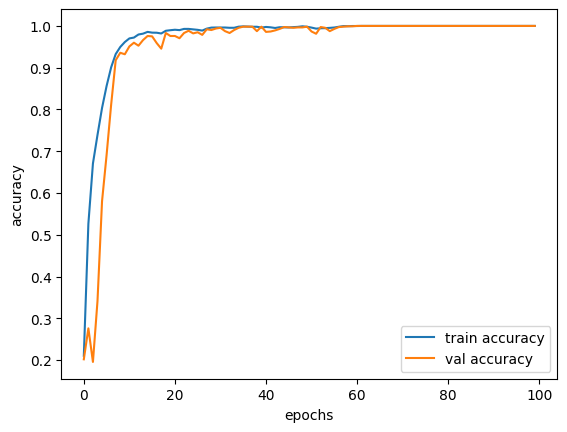

In [51]:
epochs=list(range(100))
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(epochs,acc,label="train accuracy")
plt.plot(epochs,val_acc,label="val accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

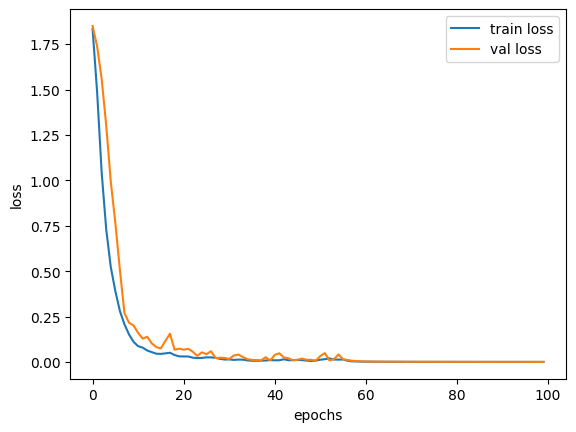

In [52]:

loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epochs,loss,label="train loss")
plt.plot(epochs,val_loss,label="val loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()